The data use in this project is from
https://github.com/abin24/Textures-Dataset

In [1]:
import cv2
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import matplotlib.image as mpimg
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

from random import randint
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras import layers
from tensorflow.keras import Model, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

setting batch size, epochs, image size

In [2]:
BATCH_SIZE = 32
EPOCHS = 50
IMAGE_SIZE = (150, 150)

tf.random.set_seed(0)

See folder

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

/kaggle/input
/kaggle/input/deep-pj-data
/kaggle/input/deep-pj-data/valid
/kaggle/input/deep-pj-data/valid/Kyberge_canvas1
/kaggle/input/deep-pj-data/valid/Kyberge_floor1
/kaggle/input/deep-pj-data/valid/Kyberge_rice2
/kaggle/input/deep-pj-data/valid/KTH_cotton
/kaggle/input/deep-pj-data/valid/Kyberge_stone3
/kaggle/input/deep-pj-data/valid/UIUC05_wood2
/kaggle/input/deep-pj-data/valid/Kyberge_stone1
/kaggle/input/deep-pj-data/valid/KTH_aluminium_foil
/kaggle/input/deep-pj-data/valid/UIUC16_glass1
/kaggle/input/deep-pj-data/valid/UIUC03_bark3
/kaggle/input/deep-pj-data/valid/UIUC08_granite
/kaggle/input/deep-pj-data/valid/UIUC14_brick1
/kaggle/input/deep-pj-data/valid/UIUC01_bark1
/kaggle/input/deep-pj-data/valid/UIUC07_water
/kaggle/input/deep-pj-data/valid/Kyberge_cushion1
/kaggle/input/deep-pj-data/valid/UIUC17_glass2
/kaggle/input/deep-pj-data/valid/UIUC22_fur
/kaggle/input/deep-pj-data/valid/UIUC09_marble
/kaggle/input/deep-pj-data/valid/Kyberge_wall1
/kaggle/input/deep-pj-data/va

Get list of all classes

In [4]:
CLASSES, count = [], [] # names of classes, count of images for each class

for root, dirs, files in os.walk('/kaggle/input/deep-pj-data/train'):
    f = os.path.basename(root)    # get class name    
        
    if len(files) > 0:
        count.append(len(files))
        if f not in CLASSES:
            CLASSES.append(f)

In [5]:
CLASSES

['Kyberge_canvas1',
 'Kyberge_floor1',
 'Kyberge_rice2',
 'KTH_cotton',
 'Kyberge_stone3',
 'UIUC05_wood2',
 'Kyberge_stone1',
 'KTH_aluminium_foil',
 'UIUC16_glass1',
 'UIUC03_bark3',
 'UIUC08_granite',
 'UIUC14_brick1',
 'UIUC01_bark1',
 'UIUC07_water',
 'Kyberge_cushion1',
 'UIUC17_glass2',
 'UIUC22_fur',
 'UIUC09_marble',
 'Kyberge_wall1',
 'Kyberge_rice1',
 'UIUC19_carpet2',
 'KTH_wool',
 'KTH_sponge',
 'KTH_linen',
 'Kyberge_scarf2',
 'Kyberge_grass1',
 'KTH_orange_peel',
 'KTH_cork',
 'Kyberge_lentils1',
 'UIUC20_upholstery',
 'Kyberge_floor2',
 'Kyberge_oatmeal1',
 'KTH_cracker',
 'Kyberge_ceiling2',
 'UIUC25_plaid',
 'UIUC15_brick2',
 'UIUC06_wood3',
 'UIUC24_corduroy',
 'Kyberge_ceiling1',
 'Kyberge_blanket2',
 'Kyberge_seat2',
 'UIUC21_wallpaper',
 'UIUC11_floor2',
 'Kyberge_sand1',
 'UIUC23_knit',
 'UIUC18_carpet1',
 'Kyberge_stone2',
 'Kyberge_pearlsugar1',
 'Kyberge_scarf1',
 'UIUC13_wall',
 'KTH_brown_bread',
 'Kyberge_rug1',
 'KTH_corduroy',
 'UIUC12_pebbles',
 'Kyberge

Get class dictionary

In [6]:
classes ={}
for i in range(0,64):
    classes[CLASSES[i]] = i

In [7]:
print(classes)

{'Kyberge_canvas1': 0, 'Kyberge_floor1': 1, 'Kyberge_rice2': 2, 'KTH_cotton': 3, 'Kyberge_stone3': 4, 'UIUC05_wood2': 5, 'Kyberge_stone1': 6, 'KTH_aluminium_foil': 7, 'UIUC16_glass1': 8, 'UIUC03_bark3': 9, 'UIUC08_granite': 10, 'UIUC14_brick1': 11, 'UIUC01_bark1': 12, 'UIUC07_water': 13, 'Kyberge_cushion1': 14, 'UIUC17_glass2': 15, 'UIUC22_fur': 16, 'UIUC09_marble': 17, 'Kyberge_wall1': 18, 'Kyberge_rice1': 19, 'UIUC19_carpet2': 20, 'KTH_wool': 21, 'KTH_sponge': 22, 'KTH_linen': 23, 'Kyberge_scarf2': 24, 'Kyberge_grass1': 25, 'KTH_orange_peel': 26, 'KTH_cork': 27, 'Kyberge_lentils1': 28, 'UIUC20_upholstery': 29, 'Kyberge_floor2': 30, 'Kyberge_oatmeal1': 31, 'KTH_cracker': 32, 'Kyberge_ceiling2': 33, 'UIUC25_plaid': 34, 'UIUC15_brick2': 35, 'UIUC06_wood3': 36, 'UIUC24_corduroy': 37, 'Kyberge_ceiling1': 38, 'Kyberge_blanket2': 39, 'Kyberge_seat2': 40, 'UIUC21_wallpaper': 41, 'UIUC11_floor2': 42, 'Kyberge_sand1': 43, 'UIUC23_knit': 44, 'UIUC18_carpet1': 45, 'Kyberge_stone2': 46, 'Kyberge_

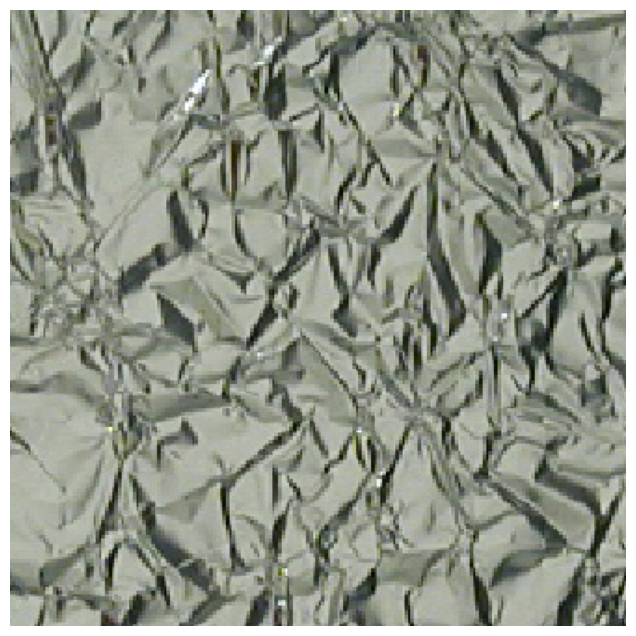

In [8]:
img = mpimg.imread('/kaggle/input/deep-pj-data/train/KTH_aluminium_foil/1.jpg')
plt.figure(figsize=(8,8))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()
# example of aluminium_foil picture

shuffle the dataframe and prune it so it can divided evenly to the batch size

In [9]:
def shuffle_prune(df, BATCH_SIZE):
    df = shuffle(df, random_state=42)
    df.reset_index(drop=True, inplace=True)
    df = df[ : df.shape[0] // BATCH_SIZE * BATCH_SIZE]
    return df

create dataframe for train data and match with their label

In [10]:
filenames = tf.io.gfile.glob('/kaggle/input/deep-pj-data/train/*/*')
image_path_df_train = pd.DataFrame(data={'filename': filenames, 'class': [x.split('/')[-2] for x in filenames]})
image_path_df_train = shuffle_prune(image_path_df_train, BATCH_SIZE)
image_path_df_train['class'] = image_path_df_train['class'].map(classes)


In [11]:
image_path_df_train

filename  class
0     /kaggle/input/deep-pj-data/train/KTH_cracker/2...     32
1     /kaggle/input/deep-pj-data/train/Kyberge_rice1...     19
2     /kaggle/input/deep-pj-data/train/Kyberge_sand1...     43
3     /kaggle/input/deep-pj-data/train/Kyberge_canva...      0
4     /kaggle/input/deep-pj-data/train/Kyberge_pearl...     47
...                                                 ...    ...
4315  /kaggle/input/deep-pj-data/train/Kyberge_grass...     25
4316  /kaggle/input/deep-pj-data/train/UIUC25_plaid/...     34
4317  /kaggle/input/deep-pj-data/train/Kyberge_cushi...     14
4318  /kaggle/input/deep-pj-data/train/Kyberge_rice2...      2
4319  /kaggle/input/deep-pj-data/train/Kyberge_stone...     46

[4320 rows x 2 columns]

In [12]:
#dict(image_path_df_train['class'])

In [13]:
print('Train sample: ', len(image_path_df_train['class']), 
      dict(image_path_df_train['class'].value_counts()))

Train sample:  4320 {3: 256, 23: 255, 52: 255, 21: 216, 27: 215, 7: 214, 33: 80, 40: 80, 28: 80, 31: 80, 18: 80, 25: 80, 51: 80, 24: 80, 63: 80, 6: 80, 57: 80, 38: 80, 48: 80, 4: 80, 55: 80, 43: 80, 0: 80, 54: 80, 30: 80, 14: 80, 39: 80, 62: 79, 2: 79, 1: 79, 19: 79, 47: 79, 56: 79, 46: 79, 22: 40, 61: 40, 50: 39, 32: 33, 26: 25, 41: 20, 12: 20, 9: 20, 37: 20, 58: 20, 5: 20, 53: 20, 44: 20, 8: 20, 20: 20, 35: 20, 29: 20, 36: 20, 10: 20, 45: 20, 15: 20, 17: 20, 34: 20, 60: 20, 59: 20, 16: 20, 49: 20, 11: 20, 13: 20, 42: 19}


Get test data

In [14]:
filenames = tf.io.gfile.glob('/kaggle/input/deep-pj-data/valid/*/*')
image_path_df_test = pd.DataFrame(data={'filename': filenames, 'class': [x.split('/')[-2] for x in filenames]})

In [15]:
image_path_df_test

filename           class
0     /kaggle/input/deep-pj-data/valid/Kyberge_floor...  Kyberge_floor1
1     /kaggle/input/deep-pj-data/valid/Kyberge_floor...  Kyberge_floor1
2     /kaggle/input/deep-pj-data/valid/Kyberge_floor...  Kyberge_floor1
3     /kaggle/input/deep-pj-data/valid/Kyberge_floor...  Kyberge_floor1
4     /kaggle/input/deep-pj-data/valid/Kyberge_floor...  Kyberge_floor1
...                                                 ...             ...
4335  /kaggle/input/deep-pj-data/valid/KTH_cork/134.jpg        KTH_cork
4336  /kaggle/input/deep-pj-data/valid/KTH_cork/218.jpg        KTH_cork
4337  /kaggle/input/deep-pj-data/valid/KTH_cork/136.jpg        KTH_cork
4338  /kaggle/input/deep-pj-data/valid/KTH_cork/364.jpg        KTH_cork
4339   /kaggle/input/deep-pj-data/valid/KTH_cork/90.jpg        KTH_cork

[4340 rows x 2 columns]

In [16]:
print('Test sample: ', len(image_path_df_test['class']), 
      dict(image_path_df_test['class'].value_counts()))

Test sample:  4340 {'KTH_cotton': 257, 'KTH_linen': 257, 'KTH_corduroy': 256, 'KTH_cork': 216, 'KTH_wool': 216, 'KTH_aluminium_foil': 216, 'Kyberge_scarf2': 80, 'Kyberge_blanket2': 80, 'Kyberge_seat2': 80, 'Kyberge_canvas1': 80, 'Kyberge_sand1': 80, 'Kyberge_floor2': 80, 'Kyberge_blanket1': 80, 'Kyberge_screen1': 80, 'Kyberge_sesameseeds1': 80, 'Kyberge_stoneslab1': 80, 'Kyberge_seat1': 80, 'Kyberge_linseeds1': 80, 'Kyberge_rug1': 80, 'Kyberge_rice1': 80, 'Kyberge_oatmeal1': 80, 'Kyberge_scarf1': 80, 'Kyberge_pearlsugar1': 80, 'Kyberge_stone2': 80, 'Kyberge_grass1': 80, 'Kyberge_ceiling1': 80, 'Kyberge_floor1': 80, 'Kyberge_rice2': 80, 'Kyberge_stone1': 80, 'Kyberge_ceiling2': 80, 'Kyberge_wall1': 80, 'Kyberge_lentils1': 80, 'Kyberge_stone3': 80, 'Kyberge_cushion1': 80, 'KTH_sponge': 41, 'KTH_brown_bread': 41, 'KTH_styrofoam': 41, 'KTH_cracker': 34, 'KTH_orange_peel': 25, 'UIUC01_bark1': 20, 'UIUC18_carpet1': 20, 'UIUC23_knit': 20, 'UIUC24_corduroy': 20, 'UIUC21_wallpaper': 20, 'UIUC08

Get Validation sample from test sample

In [17]:
image_path_df_test, image_path_df_val  = train_test_split(image_path_df_test, test_size=0.3, random_state=10, stratify=image_path_df_test['class'])
image_path_df_test = shuffle_prune(image_path_df_test, BATCH_SIZE)
image_path_df_test['class'] = image_path_df_test['class'].map(classes)

image_path_df_val = shuffle_prune(image_path_df_val, BATCH_SIZE)
image_path_df_val['class'] = image_path_df_val['class'].map(classes)

print('Test sample: ', len(image_path_df_test['class']), 
      dict(image_path_df_test['class'].value_counts()))
print('Val  sample: ', len(image_path_df_val['class']), 
      dict(image_path_df_val['class'].value_counts()))

Test sample:  3008 {3: 179, 23: 179, 52: 176, 21: 151, 7: 150, 27: 149, 56: 56, 43: 56, 33: 56, 31: 56, 39: 56, 14: 56, 2: 56, 24: 56, 6: 56, 46: 56, 30: 56, 0: 56, 4: 56, 62: 56, 63: 56, 48: 55, 1: 55, 25: 55, 19: 55, 28: 55, 57: 55, 40: 55, 47: 55, 55: 54, 18: 54, 38: 54, 54: 54, 51: 54, 61: 29, 50: 29, 22: 28, 32: 24, 26: 17, 58: 14, 49: 14, 42: 14, 59: 14, 11: 14, 5: 14, 53: 14, 36: 14, 35: 14, 15: 14, 20: 14, 45: 14, 41: 14, 17: 14, 10: 14, 60: 14, 16: 14, 13: 14, 8: 14, 44: 14, 37: 14, 9: 14, 29: 13, 12: 13, 34: 13}
Val  sample:  1280 {52: 77, 23: 77, 3: 77, 21: 65, 27: 65, 7: 63, 28: 24, 1: 24, 54: 24, 31: 24, 18: 24, 0: 24, 48: 24, 46: 24, 19: 24, 2: 24, 39: 24, 55: 24, 14: 24, 57: 24, 30: 24, 63: 24, 40: 24, 24: 23, 6: 23, 38: 23, 4: 23, 43: 23, 47: 23, 51: 23, 25: 22, 62: 22, 56: 22, 33: 21, 22: 12, 61: 12, 50: 12, 32: 10, 26: 8, 41: 6, 8: 6, 12: 6, 20: 6, 9: 6, 44: 6, 16: 6, 15: 6, 45: 6, 10: 6, 58: 6, 11: 6, 34: 6, 60: 6, 42: 6, 5: 6, 59: 6, 13: 6, 37: 6, 49: 6, 35: 6, 36: 

Get arrays and labels

In [18]:
def get_images_and_labels_arrays(df):
    images = []
    for file in df['filename']:
        image = cv2.imread(file)
        image = cv2.resize(image,IMAGE_SIZE)      
        images.append(image)
    images = np.array(images)
    
    labels = df.loc[:, 'class']
    return images, labels


In [19]:
train_images, train_labels = get_images_and_labels_arrays(image_path_df_train)

print(f'Shape of train set: {train_images.shape}')
print(f'Shape of train set: {train_labels.shape}')

Shape of train set: (4320, 150, 150, 3)
Shape of train set: (4320,)


In [20]:
print('Example of image in array',train_images[0,::])

Example of image in array [[[118 146 162]
  [130 152 172]
  [103 127 153]
  ...
  [ 89 130 158]
  [ 95 135 160]
  [ 95 135 160]]

 [[111 143 161]
  [116 147 167]
  [ 87 123 148]
  ...
  [ 85 125 154]
  [ 91 131 159]
  [ 93 134 159]]

 [[105 138 158]
  [115 148 168]
  [ 91 129 153]
  ...
  [ 76 123 154]
  [ 81 126 157]
  [ 89 129 158]]

 ...

 [[ 82 121 157]
  [ 83 126 159]
  [ 69 113 150]
  ...
  [111 146 166]
  [109 147 165]
  [107 146 165]]

 [[ 84 134 163]
  [ 68 120 147]
  [ 55 107 140]
  ...
  [124 154 174]
  [120 152 171]
  [119 152 171]]

 [[ 94 140 162]
  [ 89 134 156]
  [ 88 129 157]
  ...
  [112 145 168]
  [111 143 167]
  [109 147 170]]]


Text(0.5, 1.0, 'KTH_cracker')

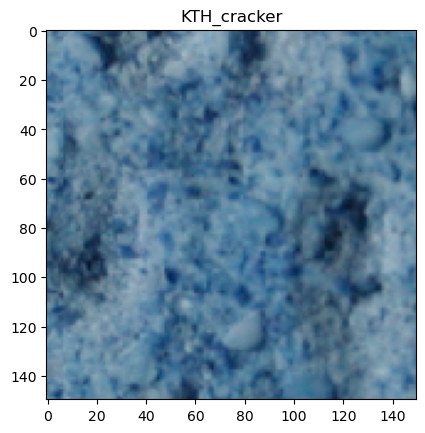

In [21]:
plt.imshow(train_images[0,::])
plt.title(CLASSES[train_labels[0]])

In [22]:
val_images, val_labels = get_images_and_labels_arrays(image_path_df_val)

print(f'Shape of validation set: {val_images.shape}')
print(f'Shape of validation set: {val_labels.shape}')

Shape of validation set: (1280, 150, 150, 3)
Shape of validation set: (1280,)


In [23]:
test_images, test_labels = get_images_and_labels_arrays(image_path_df_test)

print(f'Shape of test set: {test_images.shape}')
print(f'Shape of test set: {test_labels.shape}')

Shape of test set: (3008, 150, 150, 3)
Shape of test set: (3008,)


plot example of train_images

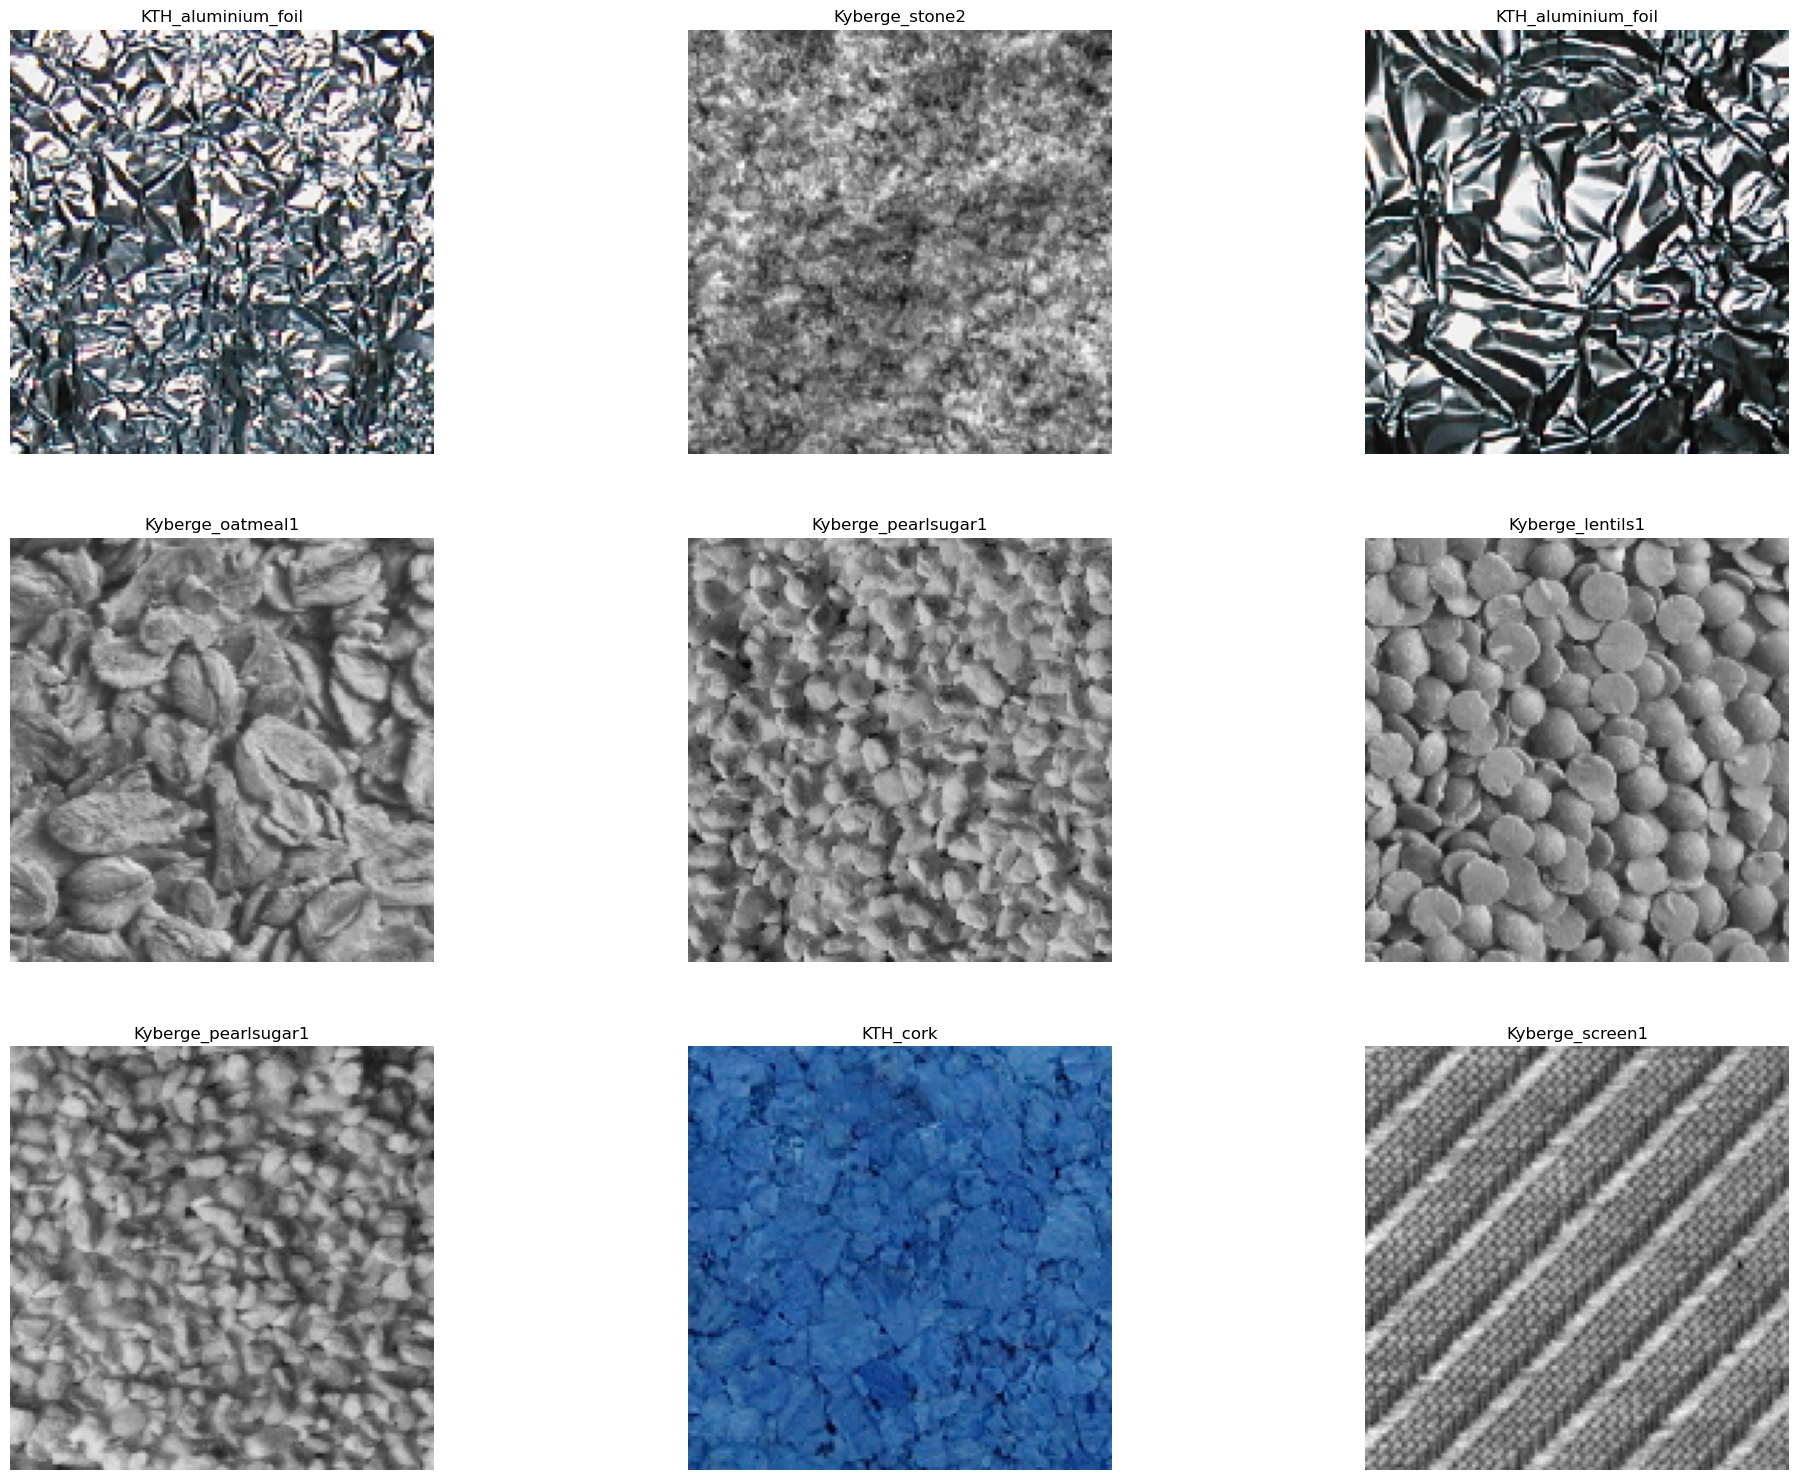

In [24]:
f,ax = plt.subplots(3,3) 
f.subplots_adjust(0,0,3,3)
for i in range(0,3,1):
    for j in range(0,3,1):
        rnd_number = randint(0,len(train_images))
        ax[i,j].imshow(train_images[rnd_number])
        ax[i,j].set_title([key for key, val in classes.items() if val == train_labels[rnd_number]][0])
        ax[i,j].axis('off')

Model

In [25]:
def create_model():
    
    with tf.device('/gpu:0'):
    
        input_layer = layers.Input(shape=(*IMAGE_SIZE, 3), name='input') 
        x = layers.BatchNormalization()(input_layer)

        x = layers.Conv2D(filters=64, kernel_size=3, 
                          activation='relu', padding='same', 
                          name='conv2d_1')(x)
        x = layers.MaxPool2D(pool_size=2, name='maxpool2d_1')(x)
        x = layers.Dropout(0.1, name='dropout_1')(x)
        
        x = layers.Conv2D(filters=64, kernel_size=3, 
                          activation='relu', padding='same', 
                          name='conv2d_2')(x)
        x = layers.MaxPool2D(pool_size=2, name='maxpool2d_2')(x)
        x = layers.Dropout(0.1, name='dropout_2')(x)
        
        x = layers.GlobalAveragePooling2D(name='global_average_pooling2d')(x)
        x = layers.BatchNormalization()(x)
        
        x = layers.Dense(128,activation='relu')(x)
        
        output = layers.Dense(units=len(classes), 
                              activation='softmax', 
                              name='output')(x)


        model = Model (input_layer, output)    
        model.compile(optimizer='adam', 
                      loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'])

    return model

model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 150, 150, 3)]     0         
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 75, 75, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        36928     
                                                             

In [26]:
init_time = datetime.datetime.now()
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 1, verbose=1, factor=0.3, min_lr=0.000001)

trained = model.fit(
                    train_images, train_labels,
                    validation_data = (val_images, val_labels),
                    batch_size = BATCH_SIZE, 
                    epochs=EPOCHS,
                    callbacks=[learning_rate_reduction],
    )

requared_time = datetime.datetime.now() - init_time
print(f'\nRequired time:  {str(requared_time)}\n')

Epoch 1/50


2023-04-05 08:31:52.389953: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


135/135 [==============================] - 13s 37ms/step - loss: 2.4094 - accuracy: 0.4065 - val_loss: 3.4648 - val_accuracy: 0.1242 - lr: 0.0010
Epoch 2/50
135/135 [==============================] - 5s 34ms/step - loss: 1.1744 - accuracy: 0.6954 - val_loss: 2.0570 - val_accuracy: 0.3930 - lr: 0.0010
Epoch 3/50
135/135 [==============================] - 5s 34ms/step - loss: 0.7870 - accuracy: 0.7845 - val_loss: 0.9366 - val_accuracy: 0.7984 - lr: 0.0010
Epoch 4/50
135/135 [==============================] - 5s 34ms/step - loss: 0.5816 - accuracy: 0.8345 - val_loss: 0.6724 - val_accuracy: 0.8148 - lr: 0.0010
Epoch 5/50
135/135 [==============================] - ETA: 0s - loss: 0.4631 - accuracy: 0.8650
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
135/135 [==============================] - 5s 35ms/step - loss: 0.4631 - accuracy: 0.8650 - val_loss: 0.6787 - val_accuracy: 0.8055 - lr: 0.0010
Epoch 6/50
135/135 [==============================] - 5s 34ms/step - 

Training process

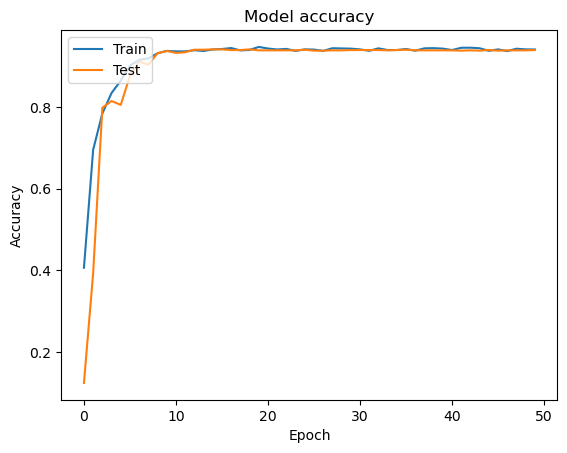

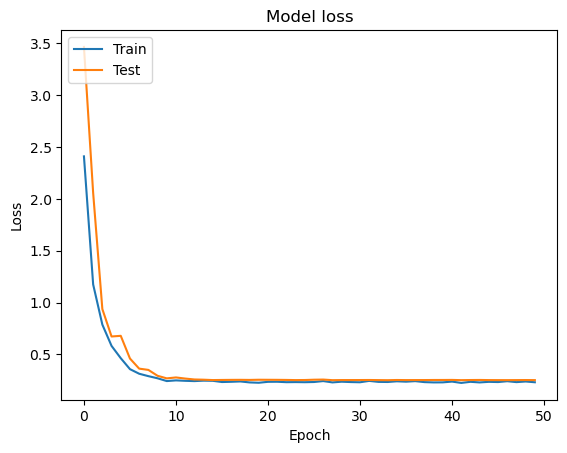

In [27]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Evaluate the trained model

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print('\naccuracy:', test_acc, '  loss: ',test_loss)


accuracy: 0.9365026354789734   loss:  0.24341578781604767


Prediction

In [29]:
test_pred = model.predict(test_images) 
predict = np.argmax(test_pred, axis=1)
predict

94/94 [==============================] - 1s 5ms/step


array([24, 21, 34, ..., 14, 21,  3])

plot predict

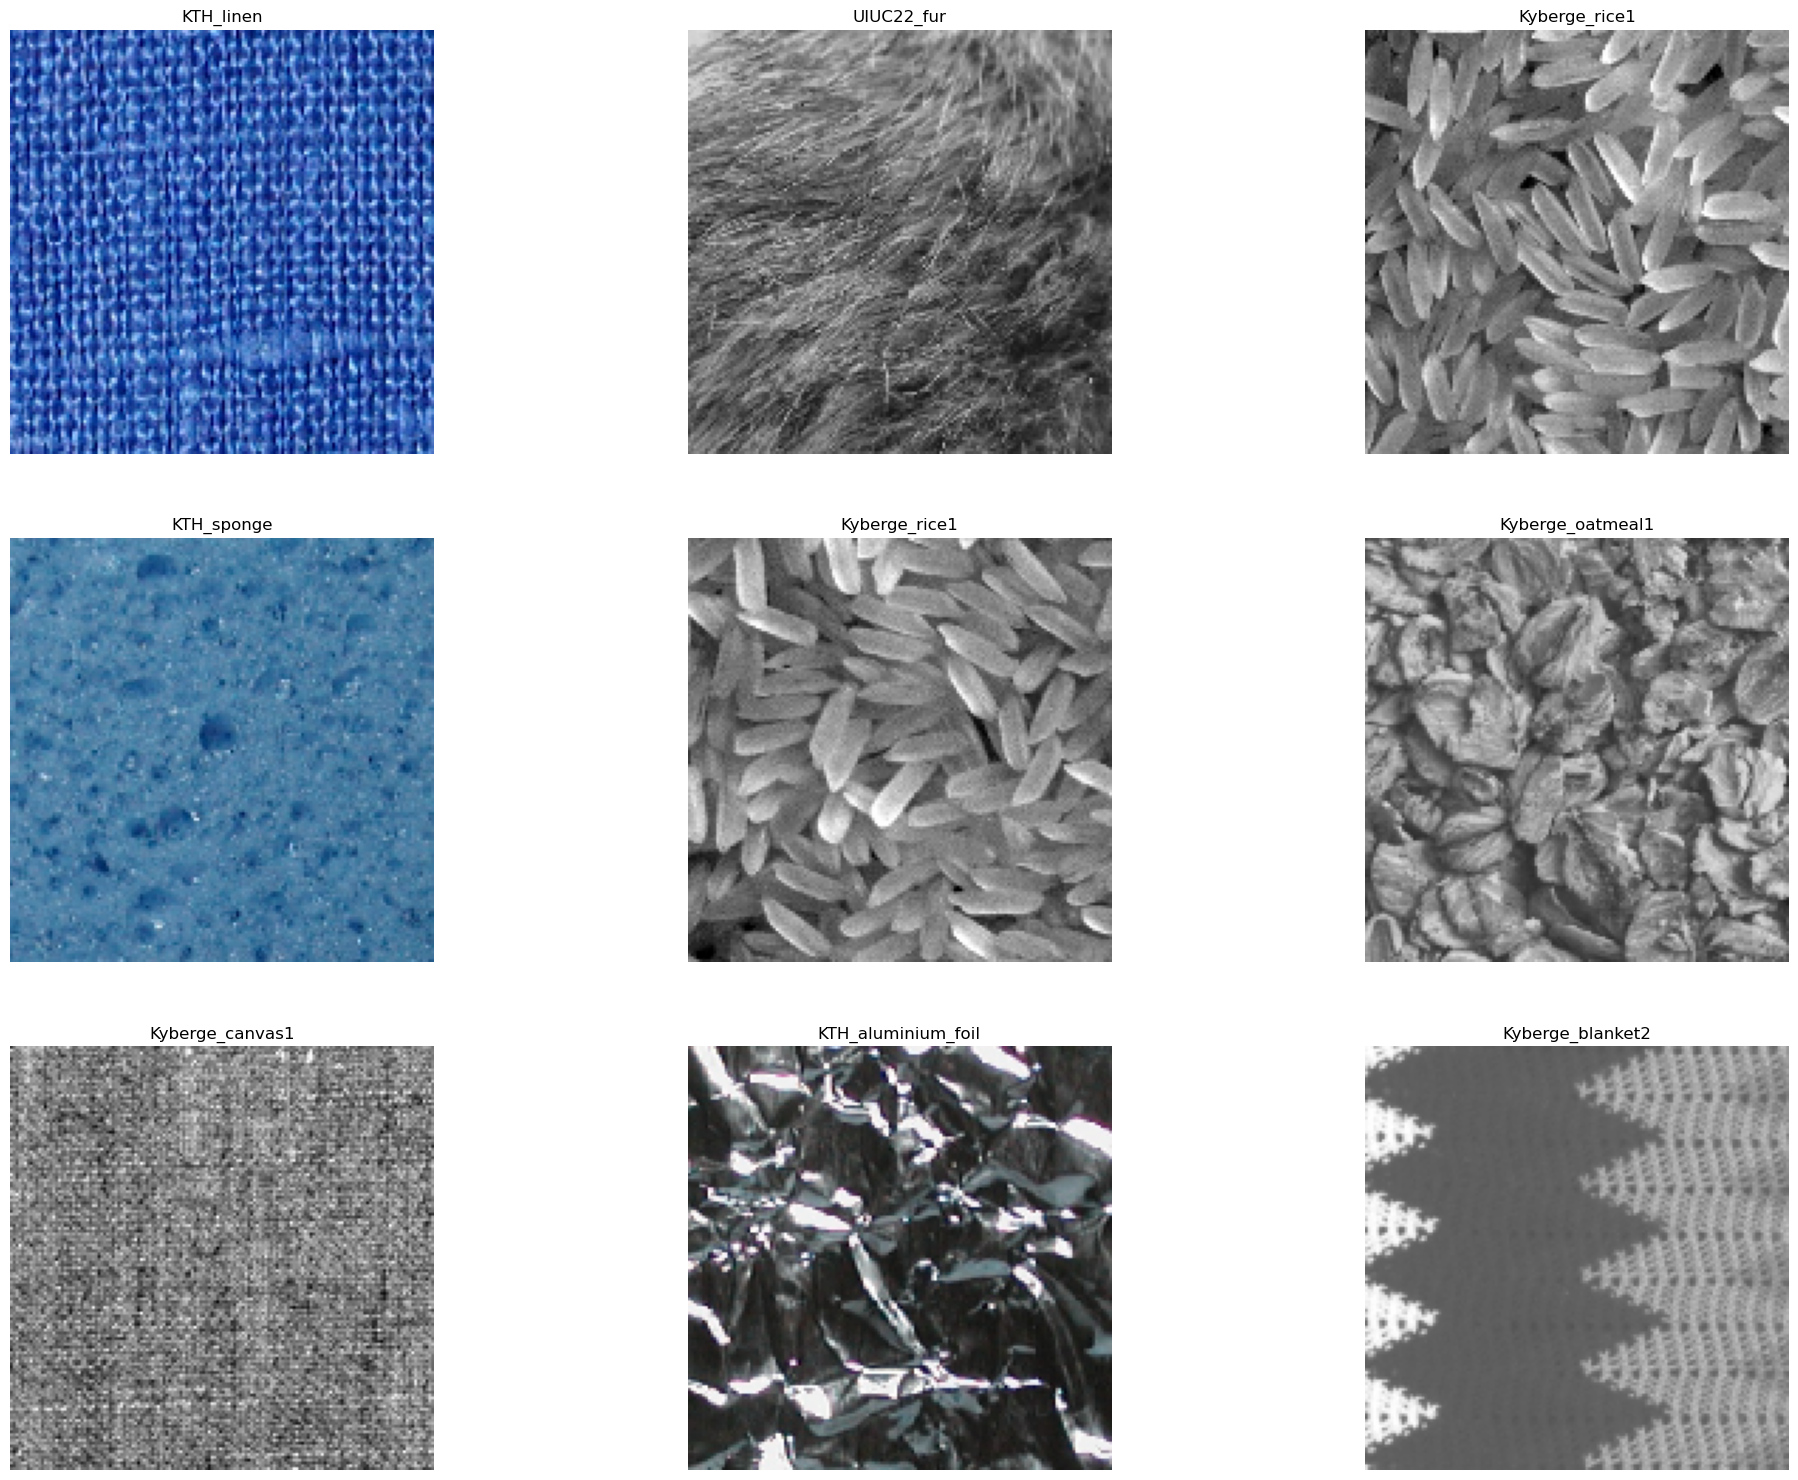

In [30]:
f,ax = plt.subplots(3,3) 
f.subplots_adjust(0,0,3,3)
for i in range(0,3,1):
    for j in range(0,3,1):
        rnd_number = randint(0,len(test_images))
        ax[i,j].imshow(test_images[rnd_number])
        ax[i,j].set_title([key for key, val in classes.items() if val == predict[rnd_number]][0])  # use predicted labels instead of test_labels
        ax[i,j].axis('off')

Classification report

In [31]:
print(classification_report(test_labels, predict), '\n')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        56
           3       0.89      0.99      0.94       179
           4       1.00      0.98      0.99        56
           5       0.79      0.79      0.79        14
           6       0.98      0.98      0.98        56
           7       0.97      0.98      0.97       150
           8       1.00      0.93      0.96        14
           9       0.67      0.57      0.62        14
          10       0.45      0.36      0.40        14
          11       0.78      0.50      0.61        14
          12       0.73      0.62      0.67        13
          13       0.81      0.93      0.87        14
          14       1.00      1.00      1.00        56
          15       0.63      0.86      0.73        14
          16       0.85      0.79      0.81        14
          17       0.69    